## Perfume E-Commerce Dataset – Exploratory and Descriptive Analysis

This analysis explores a perfume e-commerce dataset containing information on product types, brands, sales, stock availability, and customer demographics. The goal is to better understand sales patterns, popular brands, and customer preferences by gender and location. Through data cleaning, aggregation, and visualization, we aim to uncover key insights that can help guide business decisions and marketing strategies.


## Import Required Libraries for Analysis

We import essential Python libraries for data analysis and visualization:

Key considerations here are:

* `os` is used for handling file paths and directory operations, ensuring cross-platform compatibility.
* `pandas` is a powerful data manipulation library used to load, clean, and analyze structured data.
* `plotly.express` is a high-level visualization library that allows for creating interactive and insightful plots with minimal code.

These imports lay the groundwork for performing efficient data analysis and creating visual representations of insights from the dataset.


In [1]:
import os
import pandas as pd
import plotly.express as px

## Load the Cleaned Perfume Dataset

We define the path to the cleaned data file and load it into a DataFrame for analysis.

Key considerations here are:

* `processed_dir` specifies the directory where processed (cleaned) data is stored.
* `os.path.join()` constructs a platform-independent path to the cleaned dataset.
* `pd.read_csv()` loads the `cleaned_perfume_data.csv` file into a DataFrame named `combined_df`.
* This step is crucial for beginning analysis on a refined version of the dataset, free from issues like missing or inconsistent data.


In [2]:
# Define the directory and file path (same as where you saved the file)
processed_dir = r'C:\Users\USER\Downloads\Perfume_E-Commerce\data\processed'
final_file = os.path.join(processed_dir, 'cleaned_perfume_data.csv')

# Load the cleaned perfume dataset
combined_df = pd.read_csv(final_file)

In [3]:
combined_df['location'] = combined_df['location'].str.strip()

## Stock Available by Type

### Visualize Top 5 Perfume Types by Stock Availability

We analyze and visualize the top 5 perfume types based on available stock using an interactive bar chart.

Key considerations here are:

* **Directory Setup**:
  `results_dir` is defined to store output visuals, and `os.makedirs()` ensures the folder exists.

* **Data Aggregation**:
  We group the data by `cleaned_type` and sum the `available` stock for each type, then sort it in descending order to select the top 5.

* **Label Formatting**:
  `available_text` is created to display stock values with thousand separators for better readability on the chart.

* **Visualization with Plotly**:
  We use `plotly.express.bar()` to plot the top 5 types with:

  * A consistent color for clarity.
  * Data labels positioned outside bars.
  * A clean layout with no grid or tick marks to emphasize data.

* **Exporting the Plot**:
  The final chart is saved as both `.jpg` and `.png` image formats, as well as an interactive `.html` file, allowing flexible use for reports or web integration.

This process transforms aggregated stock data into a clear, professional visualization for quick insights into the most stocked perfume types.


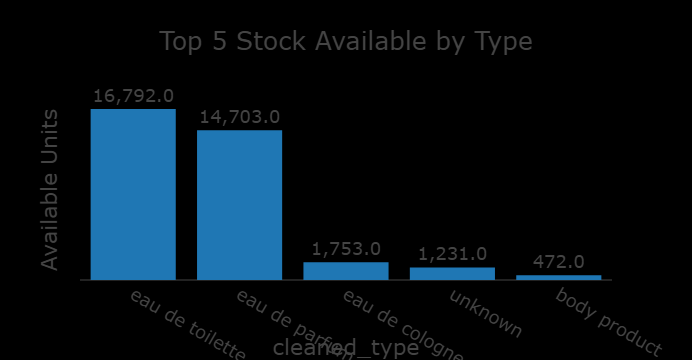

In [5]:
# Set results directory
results_dir = r'C:\Users\USER\Downloads\Perfume_E-Commerce\result'
os.makedirs(results_dir, exist_ok=True)

# Group and sum available stock by type
type_stock = combined_df.groupby('cleaned_type')['available'].sum().reset_index()

# Sort descending and take top 5
top5_type_stock = type_stock.sort_values(by='available', ascending=False).head(5)

# Create formatted labels with thousand separators
top5_type_stock['available_text'] = top5_type_stock['available'].apply(lambda x: f"{x:,}")

# Plot top 5 with same color and formatted data labels
fig1 = px.bar(
    top5_type_stock,
    x='cleaned_type',
    y='available',
    text='available_text',
    title='Top 5 Stock Available by Type',
    color_discrete_sequence=['#1f77b4']
)

# Data labels and layout tweaks
fig1.update_traces(textposition='outside', cliponaxis=False)

fig1.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    xaxis={'categoryorder': 'total descending'},
    yaxis=dict(
        showline=False,
        showticklabels=False,
        
        showgrid=False,
        title='Available Units'
    )
)

# Display the figure
fig1.show()

# Export to image and HTML
fig1.write_image(os.path.join(results_dir, 'top5_stock_available_by_type.jpg'))
fig1.write_image(os.path.join(results_dir, 'top5_stock_available_by_type.png'))
fig1.write_html(os.path.join(results_dir, 'top5_stock_available_by_type.html'))

## Units Sold by Brand
-
# 
## Visualize Top 10 Brands by Units Sold

We analyze and visualize the top 10 perfume brands based on the total units sold using a customized bar chart.

Key considerations here are:

* **Data Aggregation**:
  We group the dataset by `brand_cleaned` and calculate the total units sold for each brand using `groupby()` and `sum()`.

* **Sorting and Selection**:
  The grouped data is sorted in descending order by sales, and the top 10 brands are selected for visualization.

* **Label Formatting**:
  A new column `sold_text` is added to format sales figures with thousand separators, enhancing readability on the plot.

* **Bar Chart Visualization**:
  We use `plotly.express.bar()` to create an interactive chart:

  * Consistent color is used for visual clarity.
  * Labels are displayed above each bar for immediate insight.
  * The chart layout is styled with a dark theme and a clean presentation format.

* **Axis Customization**:
  X-axis labels (brands) are set to display horizontally with a defined font size. Y-axis gridlines and ticks are hidden for a minimalist look.

* **Exporting the Visualization**:
  The final chart is saved as `.jpg`, `.png`, and `.html` formats, making it accessible for both offline and interactive usage.

This step provides a clear and impactful visual summary of the highest-selling perfume brands, supporting data-driven decisions and presentations.


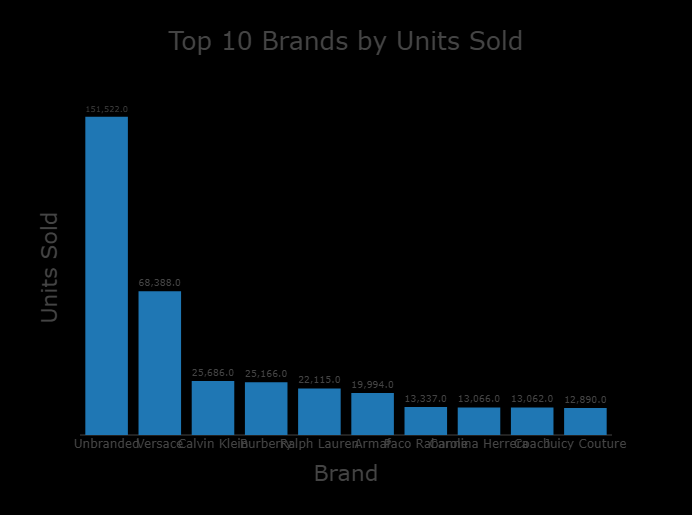

In [7]:
# Group and sum sold units by brand
brand_sold = combined_df.groupby('brand_cleaned')['sold'].sum().reset_index()

# Sort descending and take top 10
top10_brand_cleaned = brand_sold.sort_values(by='sold', ascending=False).head(10)

# Create formatted labels with thousand separators
top10_brand_cleaned['sold_text'] = top10_brand_cleaned['sold'].apply(lambda x: f"{x:,}")

# Plot top 10 brands with same color and formatted data labels
fig2 = px.bar(
    top10_brand_cleaned,
    x='brand_cleaned',
    y='sold',
    text='sold_text',
    title='Top 10 Brands by Units Sold',
    color_discrete_sequence=['#1f77b4']
)

# Show data labels above bars
fig2.update_traces(textposition='outside', cliponaxis=False)

# Style layout with dark theme, order bars descending
fig2.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    height=500,
    width=1000,
    xaxis_tickangle=0,
    xaxis=dict(
        categoryorder='total descending',
        title='Brand',
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        showline=False,
        showticklabels=False,
        showgrid=False,
        title='Units Sold'
    )
)

fig2.show()

# Export chart files
fig2.write_image(os.path.join(results_dir, 'top10_brands_by_units_sold.jpg'))
fig2.write_image(os.path.join(results_dir, 'top10_brands_by_units_sold.png'))
fig2.write_html(os.path.join(results_dir, 'top10_brands_by_units_sold.html'))

## Visualize Top 5 Locations by Units Sold

We generate a bar chart showing the top 5 geographic locations with the highest number of units sold.

Key considerations here are:

* **Data Aggregation**:
  We group the dataset by `location` and calculate the total `sold` units for each, enabling geographic analysis of sales performance.

* **Sorting and Selection**:
  After sorting by total sales in descending order, we select the top 5 locations with the highest sales.

* **Label Formatting**:
  The `sold_text` column (optional) is added to format the numbers with commas for improved readability.

* **Visualization with Plotly**:
  Using `plotly.express.bar()`, we create a bar chart:

  * Displays the top-selling locations clearly.
  * Uses a consistent color for simplicity and focus.
  * Text labels are displayed above each bar to highlight values.

* **Layout Customization**:
  A dark theme is applied with specific figure dimensions. X-axis and Y-axis titles enhance clarity, and the plot is styled for clean presentation.

* **Exporting the Chart**:
  The chart is exported in `.jpg`, `.png`, and `.html` formats, ensuring it can be used in both interactive and static environments like reports or dashboards.

This step helps identify where the highest sales volumes are occurring geographically, aiding in location-based marketing or inventory decisions.


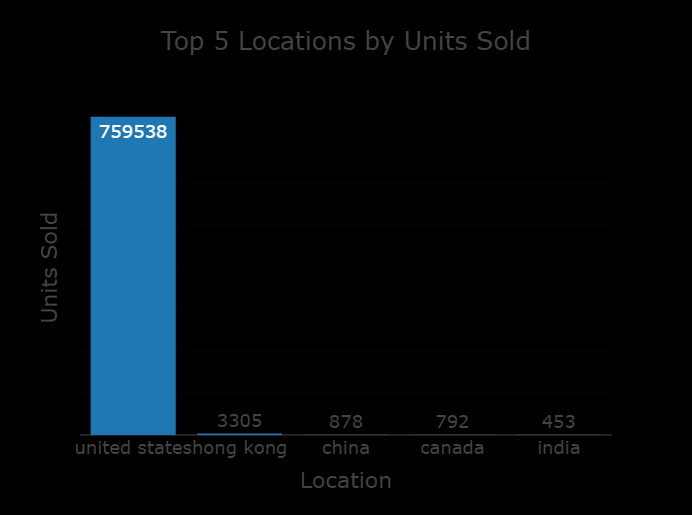

In [12]:
# Group and sum sold units by location
location_sold = combined_df.groupby('location')['sold'].sum().reset_index()

# Sort descending and take top 5
top5_location_sold = location_sold.sort_values(by='sold', ascending=False).head(5)

# (Optional) Format sold numbers with commas
top5_location_sold['sold_text'] = top5_location_sold['sold'].apply(lambda x: f"{x:,}")

# Create the figure
fig3 = px.bar(
    top5_location_sold,
    x='location',
    y='sold',
    title='Top 5 Locations by Units Sold',
    color_discrete_sequence=['#1f77b4'],
    text='sold'
)

# Customize layout (optional)
fig3.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    height=500,
    width=1000,
    xaxis=dict(tickangle=0, title='Location'),
    yaxis=dict(showticklabels=False, title='Units Sold')
)

# Show the figure
fig3.show()

# Export files
results_dir = r"C:\Users\USER\Downloads\Perfume_E-Commerce\result"
os.makedirs(results_dir, exist_ok=True)

fig3.write_image(os.path.join(results_dir, 'top5_locations_by_units_sold.jpg'))
fig3.write_image(os.path.join(results_dir, 'top5_locations_by_units_sold.png'))
fig3.write_html(os.path.join(results_dir, 'top5_locations_by_units_sold.html'))

## Visualize Units Sold by Gender

We create a pie chart to illustrate the distribution of total units sold across different customer genders.

Key considerations here are:

* **Data Aggregation**:
  We group the data by the `gender` column and sum the `sold` units to determine total sales by gender category.

* **Pie Chart Visualization**:
  Using `plotly.express.pie()`, we generate a chart that:

  * Clearly compares sales volume between genders.
  * Uses a custom color palette (`#1f77b4` for one gender and `#FFD700` for the other) to distinguish categories visually.

* **Layout Customization**:
  The chart adopts a dark theme with fixed dimensions for consistency with previous visualizations.

* **Enhanced Data Labels**:
  Labels on each pie slice display the gender, percentage of total sales, and absolute values to provide a comprehensive view at a glance.

* **Exporting the Chart**:
  The chart is saved in `.jpg`, `.png`, and `.html` formats for flexible use in reports, presentations, or web applications.

This visualization provides a quick and intuitive understanding of gender-based sales trends, supporting decisions related to marketing segmentation and product targeting.


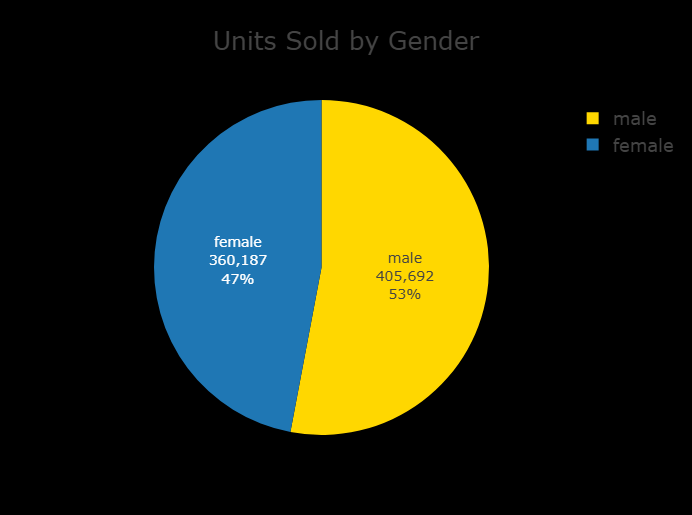

In [14]:
# Group and sum sold units by gender
gender_sold = combined_df.groupby('gender')['sold'].sum().reset_index()

# Create pie chart
fig4 = px.pie(
    gender_sold,
    names='gender',
    values='sold',
    title='Units Sold by Gender',
    color='gender',
    color_discrete_sequence=['#1f77b4', '#FFD700']
)

# Update layout: dark theme, fixed size
fig4.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    height=500,
    width=700
)

# Optional: show label + percent + value
fig4.update_traces(textinfo='label+percent+value', textfont_size=14)

# Show figure
fig4.show()

# Optional: Save chart
# results_dir = r"C:\Users\USER\Downloads\Perfume_E-Commerce\result"
os.makedirs(results_dir, exist_ok=True)

fig4.write_image(os.path.join(results_dir, 'units_sold_by_gender.jpg'))
fig4.write_image(os.path.join(results_dir, 'units_sold_by_gender.png'))
fig4.write_html(os.path.join(results_dir, 'units_sold_by_gender.html'))


## Compare Top 10 Brands by Units Sold: Men vs. Women

We create a grouped bar chart to compare the top 10 perfume brands by total units sold, broken down by gender.

Key considerations here are:

* **Data Aggregation**:

  * First, we group and sum units sold by both `brand_cleaned` and `gender`.
  * Then, we calculate total units sold per brand to identify the overall top 10 brands.

* **Filtering for Top Brands**:

  * We select only the sales data for these top 10 brands, ensuring that both men’s and women’s sales are represented.

* **Maintain Brand Order**:

  * We convert the `brand_cleaned` column to a categorical type with a specified order to preserve descending order on the x-axis.

* **Formatted Labels**:

  * `sold_text` is created to display values with thousand separators for clearer labeling on the chart.

* **Grouped Bar Chart Visualization**:

  * We use `plotly.express.bar()` to generate a grouped bar chart:

    * Bars are grouped by brand and color-coded by gender.
    * Custom labels and titles are applied for clarity.
    * A consistent color scheme is used (`#1f77b4` for one gender and `#FFD700` for the other).

* **Layout and Design**:

  * The chart uses a dark theme and is sized for wide-format presentation.
  * Text labels are positioned outside bars for visibility, and y-axis tick marks are hidden for a cleaner look.
  * The legend helps distinguish between gender groups, supporting comparative analysis.

* **Exporting the Chart**:

  * The visualization is exported in `.jpg`, `.png`, and interactive `.html` formats, making it usable in various reporting contexts.

This chart provides a gender-based sales comparison for the top 10 brands, offering insights into consumer preferences and potential market segmentation opportunities.


C:\Users\USER\AppData\Local\Temp\ipykernel_9880\3360552871.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_9880\3360552871.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



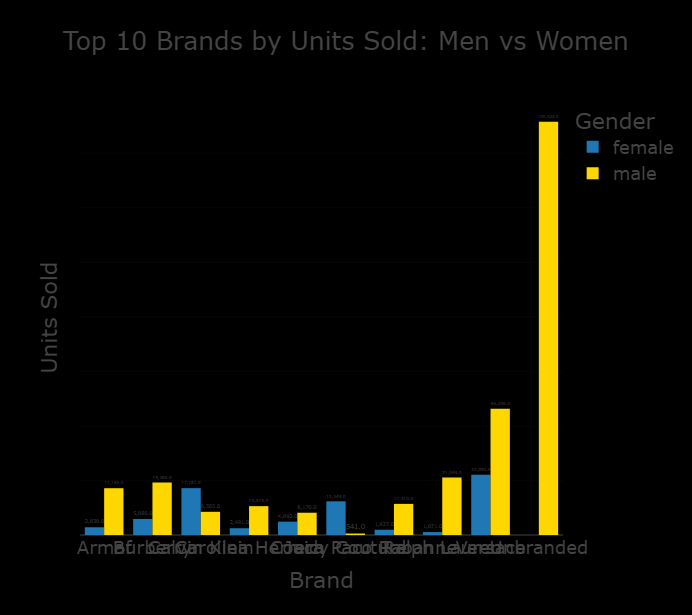

In [16]:
# 1. Group and sum units sold by brand and gender
sold_by_brand_gender = combined_df.groupby(['brand_cleaned', 'gender'])['sold'].sum().reset_index()

# 2. Total units sold by brand (to get top brands)
total_sold_by_brand = sold_by_brand_gender.groupby('brand_cleaned')['sold'].sum().reset_index()

# 3. Select top 10 brands by total sold
top10_brands = total_sold_by_brand.sort_values(by='sold', ascending=False).head(10)['brand_cleaned']

# 4. Filter original grouped data for these top 10 brands only
sold_top10 = sold_by_brand_gender[sold_by_brand_gender['brand_cleaned'].isin(top10_brands)]

# 5. Set categorical order for x-axis to keep bars in descending order
sold_top10['brand_cleaned'] = pd.Categorical(sold_top10['brand_cleaned'], categories=top10_brands, ordered=True)

# 6. Add formatted text labels with thousand separators
sold_top10['sold_text'] = sold_top10['sold'].apply(lambda x: f"{x:,}")

# 7. Create grouped bar chart comparing men and women
fig = px.bar(
    sold_top10,
    x='brand_cleaned',
    y='sold',
    color='gender',
    barmode='group',
    text='sold_text',
    title='Top 10 Brands by Units Sold: Men vs Women',
    labels={
        'brand_cleaned': 'Brand',
        'sold': 'Units Sold',
        'gender': 'Gender'
    },
    color_discrete_sequence=['#1f77b4', '#FFD700']
)

# 8. Customize labels and layout
fig.update_traces(textposition='outside', textfont_size=14)

fig.update_yaxes(showticklabels=False, title_text='Units Sold')

fig.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    xaxis_tickangle=0,
    height=600,
    width=1500,
    margin=dict(t=100),
    legend_title_text='Gender'
)

fig.show()

# Export chart to JPG and PNG images
fig.write_image(os.path.join(results_dir, 'top10_brands_units_sold_men_vs_women.jpg'))
fig.write_image(os.path.join(results_dir, 'top10_brands_units_sold_men_vs_women.png'))

# Export interactive HTML version
fig.write_html(os.path.join(results_dir, 'top10_brands_units_sold_men_vs_women.html'))